<a href="https://colab.research.google.com/github/MaryamIsoyeva/TFHub/blob/main/TFHUB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install "tensorflow>=1.7"
!pip3 install tensorflow-hub
!pip3 install seaborn

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

#Universal sentence encoder
Embeddings visualization

In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/2" # @ param ["https://tfhub.dev/google/universal-sentence-encoder/2", "https://tfhub.dev/google/universal-sentence-encoder-large/3"]

In [ ]:
embed = hub.load(module_url)
# tf.logging.set_verbosity(tf.logging.ERROR)

In [ ]:
with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    message_embeddings = session.run(embed(["messages"]))

    for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
#         print("Message: {}".format(messages[i]))
#         print(message)
        print("Embedding size: {}".format(len(message_embedding)))
        message_embedding_snippet = ", ".join(
            (str(x) for x in message_embedding[:3]))
        print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Embedding size: 512
Embedding: [-0.06557843089103699, 0.047177787870168686, -0.012693800032138824, ...]



In [ ]:
print(message_embeddings)

[[-6.55784309e-02  4.71777879e-02 -1.26938000e-02 -4.97507071e-03
   2.43705921e-02 -1.63404457e-02 -4.85350825e-02  5.84223261e-03
  -7.09256753e-02  3.79526690e-02  3.83209698e-02 -3.92533876e-02
  -2.92414445e-02  7.24862516e-02  3.48793939e-02 -7.06179114e-03
  -2.64073890e-02 -5.12281246e-02  5.73310666e-02  4.67105359e-02
  -6.15847409e-02 -6.97952956e-02  3.87863405e-02  5.78233181e-03
   2.79198345e-02  2.55135298e-02 -1.69164333e-02 -8.71730149e-02
   4.74902242e-02  3.99508923e-02 -3.16453539e-02 -1.36403646e-02
  -4.43668328e-02 -4.32409085e-02 -6.08022697e-02  4.09867615e-02
   1.13546811e-02  7.39328489e-02  1.53200114e-02 -1.50362104e-02
  -8.91407058e-02  2.00383700e-02  4.21628691e-02 -4.59326357e-02
   8.37188214e-03  5.90953641e-02 -7.71576315e-02 -4.85989042e-02
   6.07200302e-02 -5.94551526e-02  5.58279827e-03  1.25413183e-02
  -2.04406232e-02 -3.10940370e-02  5.34790307e-02 -7.53260218e-03
   7.62614384e-02 -7.11852685e-02  1.95160788e-02 -1.85668431e-02
   9.69529

In [ ]:
text = """Omar Khayyam was born in Nishapur,a leading metropolis in Khorasan during medieval times. 
Nishapur was then religiously a major center of Zoroastrians. It is likely that Khayyam's father was a Zoroastrian who had converted to Islam. He was born 
into a family of tent-makers (Khayyam). His full name, as it appears in the Arabic sources, was Abu’l Fath Omar ibn 
Ibrāhīm al-Khayyām. In medieval Persian texts he is usually simply called Omar Khayyām. His boyhood was 
passed in Nishapur. His gifts were recognized by his early tutors who sent him to study under Imam Muwaffaq Nīshābūrī,
the greatest teacher of the Khorasan region who tutored the children of the highest nobility.In 1076 Khayyam was invited to Isfahan by 
the vizier and political figure Nizam al-Mulk to take advantage of the libraries and centers in learning there. 
His years in Isfahan were productive."""

In [ ]:
# !pip install nltk
import nltk
# nltk.download('punkt')

In [ ]:
from nltk.tokenize import sent_tokenize
sents = sent_tokenize(text)

In [ ]:
def plot_similarity(labels, features, rotation):
    #The semantic similarity of two sentences can be trivially computed as the inner product of the encodings склярний добуток
    corr = np.inner(features, features)
    print(features.shape)
    print("Corr", corr)
    sns.set(font_scale=1.2)
    g = sns.heatmap(corr,xticklabels=labels, yticklabels=labels, vmin=0,vmax=1,cmap="YlOrRd")
    g.set_xticklabels(labels, rotation=rotation)
    g.set_title("Semantic Textual Similarity")
    return corr

def run_and_plot(session_, input_tensor_, messages_, encoding_tensor):
    message_embeddings_ = session_.run(encoding_tensor, feed_dict={input_tensor_: messages_})
    corr = plot_similarity(messages_, message_embeddings_, 90)
    return corr, message_embeddings_

(9, 512)
Corr [[1.         0.54037493 0.48361602 0.67750716 0.54267997 0.5447252
  0.5599023  0.5161536  0.48895156]
 [0.54037493 0.9999996  0.7230601  0.46805868 0.6468626  0.6014618
  0.4211952  0.6053392  0.55987155]
 [0.48361602 0.7230601  1.0000001  0.5388088  0.75266254 0.64315367
  0.44697565 0.592733   0.4939052 ]
 [0.67750716 0.46805868 0.5388088  0.99999976 0.48182905 0.43759015
  0.666046   0.5027698  0.57435775]
 [0.54267997 0.6468626  0.75266254 0.48182905 1.0000002  0.79004306
  0.44641107 0.58783066 0.44801894]
 [0.5447252  0.6014618  0.64315367 0.43759015 0.79004306 0.9999999
  0.37867332 0.55388033 0.44534153]
 [0.5599023  0.4211952  0.44697565 0.666046   0.44641107 0.37867332
  1.0000004  0.46534458 0.6250924 ]
 [0.5161536  0.6053392  0.592733   0.5027698  0.58783066 0.55388033
  0.46534458 0.9999998  0.5183027 ]
 [0.48895156 0.55987155 0.4939052  0.57435775 0.44801894 0.44534153
  0.6250924  0.5183027  1.        ]]


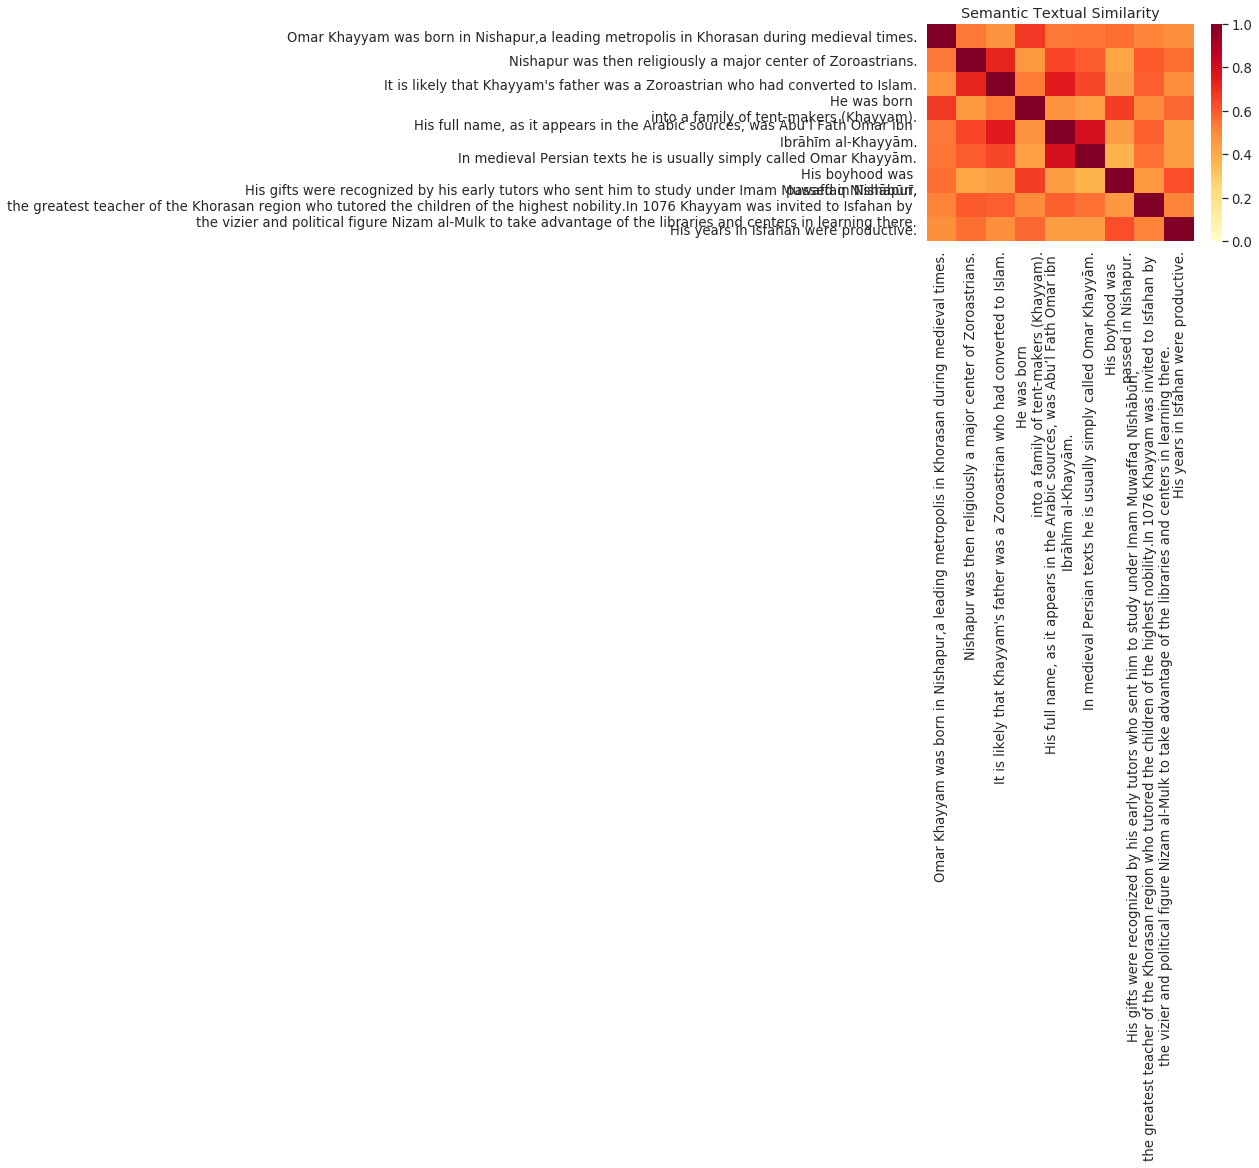

In [ ]:
messages = sents 
similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    session.run(tf.tables_initializer())
    corr, message_embeddings_ = run_and_plot(session, similarity_input_placeholder, messages, similarity_message_encodings)

#Використання TensorFLow Hub для отримання векторних представлень та тренування моделей 

Розглянемо датасет рев'ю користувачів з сайту yelp для класифікації як позитивний або негативний

In [ ]:
import tensorflow_datasets as tfd
train, testdat = tfd.load("yelp_polarity_reviews", split =["train", "test"], batch_size=-1, as_supervised=True)

Модель з заздалегідь натренованого шару ембедінгу та повнозв'язного шару 

In [ ]:
import tensorflow_datasets as tfd

modelurl = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
embedding_num = 20

# modelurl = "https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1"
# embedding_num = 128

embed_layer = hub.KerasLayer(modelurl, output_shape=[embedding_num], input_shape=[], dtype=tf.string, trainable=True)

model = tf.keras.Sequential()

model.add(embed_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


Використаємо дві моделі, які надає Tensor Flow Hub

Використаємо їх для отримання векторних представлень тексту для подальшої калсифікації сентименту 

PMI

Pointwise mutual information

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/ff54cfce726857db855d4dd0a9dee2c6a5e7be99)

A Neural Probabilistic Language Model

![alt text](https://miro.medium.com/max/1400/1*EqKiy4-6tuLSoPP_kub33Q.png)

Розділимо датасет на тренувальний, тестовий та валідаційний

In [ ]:
train_x , train_y = tfd.as_numpy(train)
test_x, test_y = tfd.as_numpy(testdat)
train_num = len(train_x)
validation_num = int(train_num * 0.2)
valid_x, valid_y = train_x[:validation_num], train_y[:validation_num]
train_x, train_y = train_x[validation_num:], train_y[validation_num:]

In [ ]:
print(train_x[0])
embed_layer = hub.KerasLayer(modelurl)
print(embed_layer([train_x[0]]))

b'Never disappointing!  We have visited this location several times and have never been disappointed by the food or service. Service can be a little patchy, however never anything bad enough to warrant complaint. The food quality and quantity is excellent. Salads and steaks are  always perfect. The price is right! Cannot say enough good things about this restaurant.'
tf.Tensor(
[[ 1.0991473  -1.8800591   1.5602086   1.6162806  -2.4505723  -3.1997933
  -0.6710666   0.7338979   1.4399463   0.3142285   0.04579451  1.3366207
  -0.5027558   0.47263795 -3.1454823   0.7896361   3.490384   -0.61408603
  -0.83576816 -0.8643116 ]], shape=(1, 20), dtype=float32)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
train_dat = model.fit(train_x, train_y, epochs=15, batch_size=512, validation_data=(valid_x, valid_y), verbose=1)

Epoch 1/15
875/875 [==============================] - 24s 27ms/step - loss: 0.3063 - accuracy: 0.8652 - val_loss: 0.2100 - val_accuracy: 0.9144
Epoch 2/15
875/875 [==============================] - 23s 26ms/step - loss: 0.1937 - accuracy: 0.9218 - val_loss: 0.1947 - val_accuracy: 0.9212
Epoch 3/15
875/875 [==============================] - 22s 25ms/step - loss: 0.1827 - accuracy: 0.9267 - val_loss: 0.1943 - val_accuracy: 0.9214
Epoch 4/15
875/875 [==============================] - 23s 26ms/step - loss: 0.1778 - accuracy: 0.9289 - val_loss: 0.1908 - val_accuracy: 0.9231
Epoch 5/15
875/875 [==============================] - 22s 25ms/step - loss: 0.1750 - accuracy: 0.9297 - val_loss: 0.1902 - val_accuracy: 0.9233
Epoch 6/15
875/875 [==============================] - 22s 25ms/step - loss: 0.1727 - accuracy: 0.9308 - val_loss: 0.1905 - val_accuracy: 0.9229
Epoch 7/15
875/875 [==============================] - 22s 26ms/step - loss: 0.1710 - accuracy: 0.9317 - val_loss: 0.1917 - val_accuracy:

In [ ]:
evaluate = model.evaluate(test_x, test_y)
print(evaluate)

1188/1188 [==============================] - 4s 4ms/step - loss: 0.1887 - accuracy: 0.9248
[0.18867571651935577, 0.924842119216919]


In [ ]:
traindatdata = train_dat.history

Простежимо, як змінювалась точність за епохами

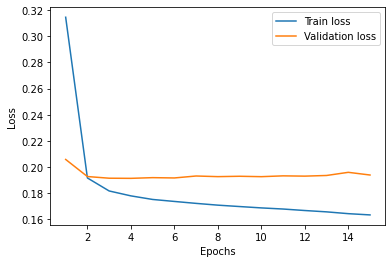

In [ ]:
accuracy = traindatdata['accuracy']
validation_accuracy = traindatdata['val_accuracy']
loss = traindatdata['loss']
validation_loss = traindatdata['val_loss']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, loss, label='Train loss')
plt.plot(epochs, validation_loss, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

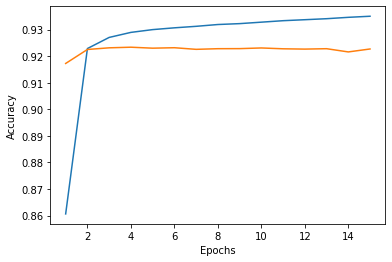

In [ ]:
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, validation_accuracy, label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
def compareModels(modelurlcom, embedding_num):
  modelurl = modelurlcom
  embedding_num = embedding_num
  embed_layer = hub.KerasLayer(modelurl, output_shape=[embedding_num], input_shape=[], dtype=tf.string, trainable=True)
  model = tf.keras.Sequential()
  model.add(embed_layer)
  model.add(tf.keras.layers.Dense(16, activation='relu'))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
  model.summary()
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  train_dat = model.fit(train_x, train_y, epochs=11, batch_size=512, validation_data=(valid_x, valid_y), verbose=1)
  evaluate = model.evaluate(test_x, test_y)
  print(evaluate)
  vizCompare(train_dat)

def compareEmbeddings(modelurlcom, embedding_num):
  modelurl = modelurlcom
  embedding_num = embedding_num
  embed_layer = hub.KerasLayer(modelurl, output_shape=[embedding_num], input_shape=[], dtype=tf.string, trainable=True)
  model = tf.keras.Sequential()
  model.add(embed_layer)
  model.add(tf.keras.layers.Dense(16, activation='relu'))
  model.add(tf.keras.layers.Dense(32, activation='relu'))
  model.add(tf.keras.layers.Dense(56, activation='relu'))
  model.add(tf.keras.layers.Dense(56, activation='relu'))
  model.add(tf.keras.layers.Dense(16, activation='relu'))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
  model.summary()
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  train_dat = model.fit(train_x, train_y, epochs=15, batch_size=512, validation_data=(valid_x, valid_y), verbose=1)
  evaluate = model.evaluate(test_x, test_y)
  print(evaluate)
  vizCompare(train_dat)
  
def vizCompare(train_dat):
  traindatdata = train_dat.history
  accuracy = traindatdata['accuracy']
  validation_accuracy = traindatdata['val_accuracy']
  loss = traindatdata['loss']
  validation_loss = traindatdata['val_loss']
  epochs = range(1, len(accuracy)+1)
  plt.plot(epochs, loss, label='Train loss')
  plt.plot(epochs, validation_loss, label='Validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  plt.plot(epochs, accuracy, label='Training accuracy')
  plt.plot(epochs, validation_accuracy, label='Validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.show()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_13 (KerasLayer)  (None, 20)                400020    
_________________________________________________________________
dense_14 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________
Epoch 1/11
875/875 [==============================] - 24s 27ms/step - loss: 0.3214 - accuracy: 0.8532 - val_loss: 0.2102 - val_accuracy: 0.9144
Epoch 2/11
875/875 [==============================] - 22s 25ms/step - loss: 0.1947 - accuracy: 0.9212 - val_loss: 0.1946 - val_accuracy: 0.9216
Epoch 3/11
875/875 [==============================] - 22s 25ms/step - loss: 0.1832 - accur

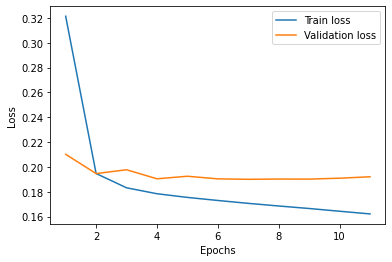

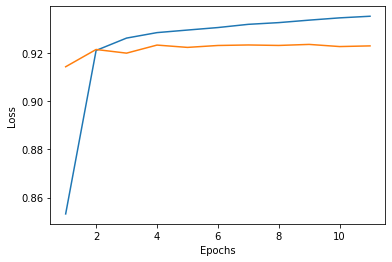

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_14 (KerasLayer)  (None, 128)               124642688 
_________________________________________________________________
dense_16 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 124,644,769
Trainable params: 124,644,769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/11
875/875 [==============================] - 44s 51ms/step - loss: 0.2224 - accuracy: 0.9098 - val_loss: 0.1897 - val_accuracy: 0.9238
Epoch 2/11
875/875 [==============================] - 44s 51ms/step - loss: 0.1683 - accuracy: 0.9336 - val_loss: 0.1925 - val_accuracy: 0.9230
Epoch 3/11
875/875 [==============================] - 44s 51ms/step - loss: 0.1537

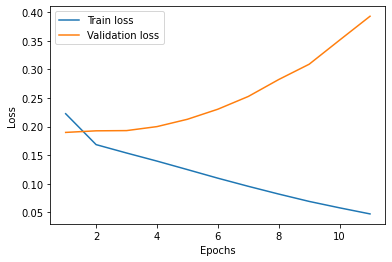

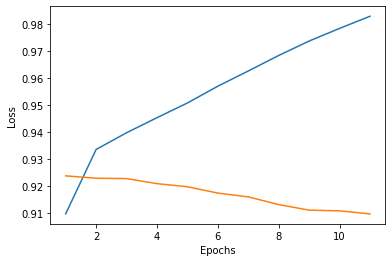

In [ ]:
modelurl = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
embedding_num = 20
compareModels(modelurl, embedding_num)
modelurl = "https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1"
embedding_num = 128
compareModels(modelurl, embedding_num)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_45 (KerasLayer)  (None, 20)                400020    
_________________________________________________________________
dense_32 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_33 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_34 (Dense)             (None, 56)                1848      
_________________________________________________________________
dense_35 (Dense)             (None, 56)                3192      
_________________________________________________________________
dense_36 (Dense)             (None, 16)                912       
_________________________________________________________________
dense_37 (Dense)             (None, 1)               

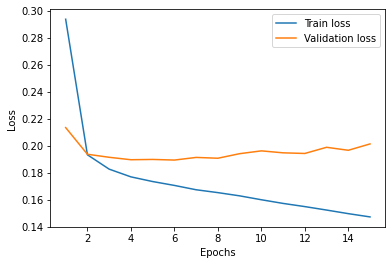

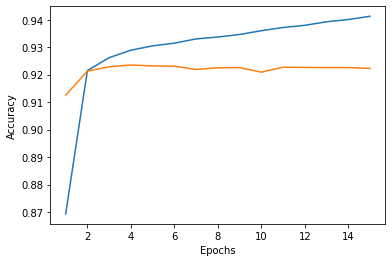

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_46 (KerasLayer)  (None, 128)               124642688 
_________________________________________________________________
dense_38 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_39 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_40 (Dense)             (None, 56)                1848      
_________________________________________________________________
dense_41 (Dense)             (None, 56)                3192      
_________________________________________________________________
dense_42 (Dense)             (None, 16)                912       
_________________________________________________________________
dense_43 (Dense)             (None, 1)               

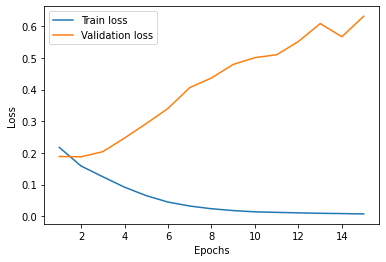

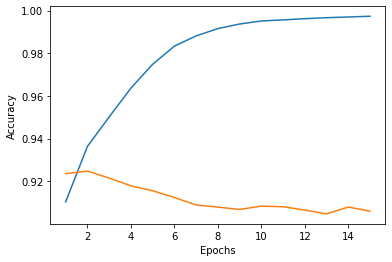

In [ ]:
modelurl = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
embedding_num = 20
compareEmbeddings(modelurl, embedding_num)
modelurl = "https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1"
embedding_num = 128
compareEmbeddings(modelurl, embedding_num)

In [ ]:
def getEmbedding(modelurlcom, embnum, num):
  embed_layer = hub.KerasLayer(modelurl)
  return embed_layer(test_x[:num])

In [ ]:
print(test_x[:5])
# modelurl = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
print(getEmbedding(modelurl, embedding_num, 30).shape)

[b'Was not impressed, and will not return.'
 b'I went in to purchase overalls and was treated so rudely I had to walk out even though he had the item I wanted.  I will never step foot in this placec of business again.'
 b'This place really is horrible... Every time I wind up getting convinced to go here, I always walk out feeling like my pocket has been picked. The food isn\'t \\""bad,\\"" but at roughly $25-$30 per person, there are SO many better places to eat. To hell with Olive Garden.\\n\\nAnd this particular one has the worst-smelling parking lot in Las Vegas... every time I drive by (to go to B.J.\'s nearby, which is a thousand times better), it smells like a sewer main broke or something. \\n\\n2 stars only because the wait staff is friendly.'
 b'First time visit.....  enjoyed their little cheese biscuits .... Had the ribs,beef brisket,mashed taters with gravy, Mac and cheese was goooood. Very cheesy and creamy just how I like it and collard greens had a smoky taste to it, wond

In [ ]:
print(embedding_num)

20


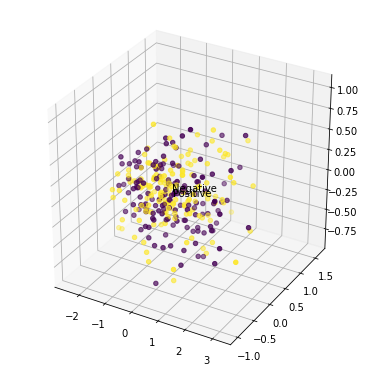

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
# pca = PCA(n_components=3)
# fig = plt.figure(1, figsize=(5, 5))
# ax = Axes3D(fig)
# emb = getEmbedding(modelurl, embedding_num, len(test_y))
# pca.fit(emb)
# emb = pca.transform(emb)
# for name, label in [('Positive', 0), ('Negative', 1)]:
#   ax.text3D(emb[test_y==label, 0].mean(), emb[test_y==label, 1].mean(), emb[test_y==label, 2].mean(), name)
# y = np.choose(test_y, [1, 2, 0]).astype(np.float)
# ax.scatter(emb[:,0], emb[:,1], emb[:,2], c = y)

modelurl = "https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1"
embedding_num = 128
pca = PCA(n_components=3)
fig = plt.figure(1, figsize=(5, 5))
ax = Axes3D(fig)
emb = getEmbedding(modelurl, embedding_num, 300)
pca.fit(emb)
emb = pca.transform(emb)
testy = test_y[:300]
for name, label in [('Positive', 0), ('Negative', 1)]:
  ax.text3D(emb[testy==label, 0].mean(), 
            emb[testy==label, 1].mean(), emb[testy==label, 2].mean(), name)
y = np.choose(testy, [1, 2, 0]).astype(np.float)
ax.scatter(emb[:,0], emb[:,1], emb[:,2], c = y)
# plt.show()

In [ ]:
testdattsn= getEmbedding(modelurl, embedding_num, 300)

In [ ]:
def trainEmbed(model, num, trains):
  embed_layer = hub.KerasLayer(model)
  return embed_layer(train_x[:trains])

Класифікація за методом опорних векторів

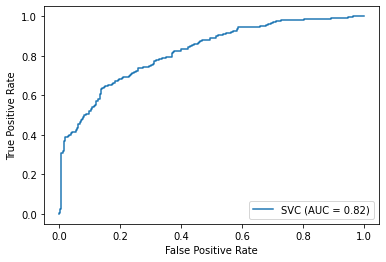

In [ ]:
# !pip install --upgrade scikit-learn
modelurl = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
embedding_num = 20
trains = 1000
trainVec = trainEmbed(modelurl, embedding_num, trains)
from sklearn.svm import SVC
svc = SVC()
classification = svc.fit(trainVec, train_y[:trains])

# from sklearn.ensemble import RandomForestClassifier
# fc = RandomForestClassifier()
# forest_classification = fc.fit(trainVec, train_y[:trains])

from sklearn.metrics import plot_roc_curve
testnum = 600
embeddings = getEmbedding(modelurl, embedding_num, testnum)
svc_roc = plot_roc_curve(svc, embeddings, test_y[:testnum])
# ax = plt.gca()
# fc_roc = plot_roc_curve(fc, embeddings, test_y[:testnum])
# svc_roc.plot(ax=ax)
plt.show()

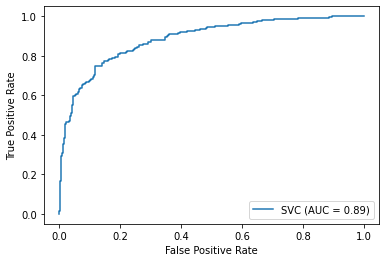

In [ ]:
modelurl = "https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1"
embedding_num = 128
trainVec = trainEmbed(modelurl, embedding_num, trains)
svc = SVC()
classification128 = svc.fit(trainVec, train_y[:trains])
embeddings128 = getEmbedding(modelurl, embedding_num, testnum)
svc_roc = plot_roc_curve(svc, embeddings128, test_y[:testnum])
plt.show()

Крос валідація

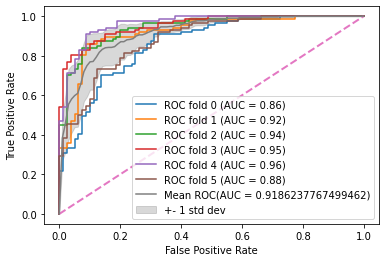

In [ ]:
from sklearn.metrics import auc
from sklearn.model_selection import StratifiedKFold
from numpy import interp
cv = StratifiedKFold(n_splits=6)
trainVec=np.c_[trainVec]
fig, ax = plt.subplots()
train_labels = train_y[:trains]
svc = SVC()
tpr =[]
aucvec = []
mean_fpr = np.linspace(0, 1, 100)
for i, (traini, testi) in enumerate(cv.split(trainVec, train_labels)):
  # print(traini)
  svc.fit(trainVec[traini[0]:traini[-1]], train_labels[traini[0]:traini[-1]])
  v = plot_roc_curve(svc, trainVec[testi], train_labels[testi], name='ROC fold {}'.format(i), ax=ax)
  intpr = interp(mean_fpr, v.fpr, v.tpr)
  intpr[0] = 0.0
  tpr.append(intpr)
  aucvec.append(v.roc_auc)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2)
mean_tpr =np.mean(tpr, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucvec)
ax.plot(mean_fpr, mean_tpr, label='Mean ROC(AUC = {})'.format(mean_auc))
std_tpr = np.std(tpr, axis=0)
tpr_upper = np.minimum(mean_tpr+std_tpr, 1)
tpr_lo = np.maximum(mean_tpr-std_tpr, 0)
ax.fill_between(mean_fpr, tpr_lo, tpr_upper, color='grey', alpha=.3, label='+- 1 std dev')
ax.legend()
plt.show()

[[202  94]
 [ 69 235]]
[[222  74]
 [ 51 253]]


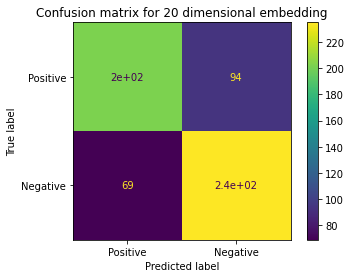

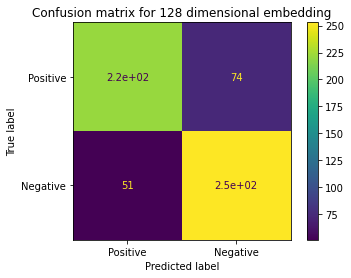

In [ ]:
import sys
from sklearn.metrics import plot_confusion_matrix
np.set_printoptions(precision=7,threshold=sys.maxsize)
pl = plot_confusion_matrix(classification, embeddings, test_y[:testnum], display_labels=['Positive', 'Negative'])
pl.ax_.set_title("Confusion matrix for 20 dimensional embedding")
print(pl.confusion_matrix)

pl128 = plot_confusion_matrix(classification128, embeddings128, test_y[:testnum], display_labels=['Positive', 'Negative'])
pl128.ax_.set_title("Confusion matrix for 128 dimensional embedding")
print(pl128.confusion_matrix)

# fpl = plot_confusion_matrix(forest_classification, embeddings, test_y[:testnum], display_labels=['Positive', 'Negative'])
# pl.ax_.set_title("Confusion matrix for random forest")
# print(fpl.confusion_matrix)

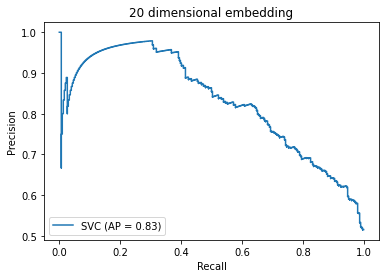

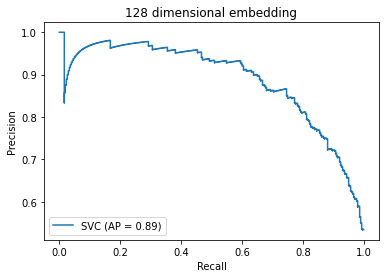

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
pr = plot_precision_recall_curve(classification, embeddings, test_y[:testnum])
pr.ax_.set_title('20 dimensional embedding')
pr128 = plot_precision_recall_curve(classification128, embeddings128, test_y[:testnum])
pr128.ax_.set_title('128 dimensional embedding')
plt.show()

In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/2"
embed_layer = hub.KerasLayer(module_url)
embed_layer(test_x[:1]).shape

TensorShape([1, 512])

In [ ]:
import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False
use = trainEmbed(module_url, 512, 3000)

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/c7bc5dc859db1eb2debb5e1521c954ca2829c9a7)

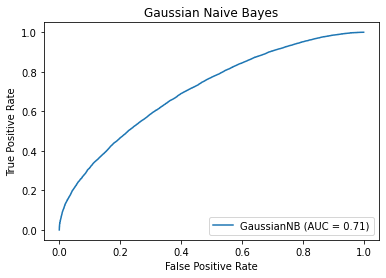

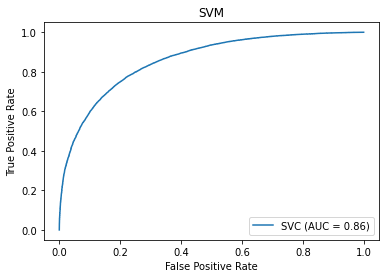

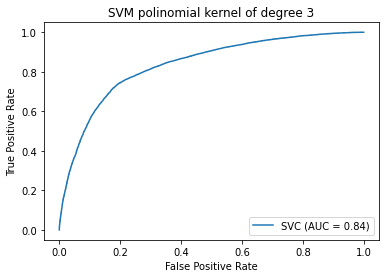

In [ ]:
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_roc_curve
nb = GaussianNB()
# print(len(train_x))
testnum = 90000
trainnum = 10000
trainemb = embed_layer(train_x[:trainnum])
nb.fit(trainemb, train_y[:trainnum])
testembuse = embed_layer(test_x[:testnum])
testlabels = test_y[:testnum]
nb_roc = plot_roc_curve(nb, testembuse, testlabels)
plt.title('Gaussian Naive Bayes')
plt.show()

from sklearn.svm import SVC
svc = SVC()
svc.fit(trainemb, train_y[:trainnum])
svc_roc = plot_roc_curve(svc, testembuse, testlabels)
plt.title("SVM")
plt.show()

svc = SVC(kernel='poly')
svc.fit(trainemb, train_y[:trainnum])
svc_roc = plot_roc_curve(svc, testembuse, testlabels)
plt.title("SVM polinomial kernel of degree 3")
plt.show()
# from sklearn import tree
# dc = tree.DecisionTreeClassifier()
# dc.fit(trainemb,train_y[:trainnum])
# dc_roc = plot_roc_curve(dc, testembuse, testlabels)
# plt.title("Decision tree")
# plt.show()
# l = nb.predict(test_x, test_y)
# gc = Ga

In [ ]:
print(train_x[:1])
print(train_y[:1])

[b'Never disappointing!  We have visited this location several times and have never been disappointed by the food or service. Service can be a little patchy, however never anything bad enough to warrant complaint. The food quality and quantity is excellent. Salads and steaks are  always perfect. The price is right! Cannot say enough good things about this restaurant.']
[1]


In [ ]:
svc.predict(embed_layer(train_x[:1]))

array([0])